### 5-fold cv

In [72]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer
import numpy as np

In [73]:
data_root = "./datasets/"

In [74]:
X, y = load_svmlight_file(data_root+"disorder.libsvm.dat")

In [75]:
linerSVM = SVC(C=1.0, kernel='linear',  random_state=31390)

In [76]:
def tn(y_true,y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true,y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true,y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true,y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def q2(y_true,y_pred): return (tp(y_true, y_pred)+tn(y_true, y_pred))/(tp(y_true, y_pred)+tn(y_true, y_pred)+fn(y_true, y_pred)+fp(y_true, y_pred))

In [77]:
scores = cross_val_score(linerSVM, X, y, cv=5, scoring=make_scorer(q2))
#5-folf cross validation
#todo: Q2 accuracy = TP+TN/TP+TN+FN+FP ?

In [78]:
print("Accuracy:%0.2f(+/-%0.2f)" % (scores.mean(), scores.std()*2))

Accuracy:0.91(+/-0.07)


### ROC AUC

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve 
from sklearn.metrics import roc_auc_score

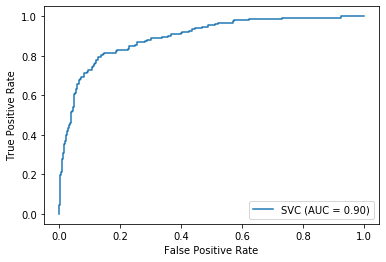

auc:  0.895360514801832


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=31390)
linerSVM_ = SVC(C=1.0, kernel='linear',  random_state=31390, probability=True)
linerSVM_.fit(X_train, y_train)
plot_roc_curve(linerSVM_, X_test, y_test)
plt.show()
print("auc: ", roc_auc_score(y_test, linerSVM_.predict_proba(X_test)[:,1]))

In [81]:
linerSVM_.predict_proba(X_test)

array([[0.9955353 , 0.0044647 ],
       [0.86037819, 0.13962181],
       [0.97108923, 0.02891077],
       ...,
       [0.995663  , 0.004337  ],
       [0.95108272, 0.04891728],
       [0.99044602, 0.00955398]])

### GridSearch

In [82]:
from sklearn.model_selection import GridSearchCV


In [100]:
prarm_grid={"C" : [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]}
linerSVM_GS = SVC(kernel='linear',random_state=31390)
clf_GS = GridSearchCV(linerSVM_GS, prarm_grid,scoring="roc_auc")
clf_GS.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=31390,
                           shrinking=True, tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [101]:
print("best C:",clf_GS.best_params_["C"])
print("best auc: ", roc_auc_score(y_test, clf_GS.decision_function(X_test)))

best C: 0.005
best auc:  0.9633664253000025


### with for 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=31390)
best_auc = 0
best_c = 0
for c in prarm_grid["C"]:
    linerSVM_GS_f = SVC(C=c, kernel="linear",probability=True,random_state=31390)
    linerSVM_GS_f.fit(X_train, y_train)
    y_perdict = linerSVM_GS_f.predict_proba(X_train)
    auc = roc_auc_score(y_train, y_perdict[:,1])
    y_perdict_test = linerSVM_GS_f.predict_proba(X_test)
    auc_test = roc_auc_score(y_test,y_perdict_test[:,1])
    print("for c = ", c," auc is: ", auc,"  Test auc is: ",auc_test)
    if auc_test > best_auc:
        best_auc = auc_test
        best_c = c


for c =  0.001  auc is:  0.9802226257734733   Test auc is:  0.9338603101092546
for c =  0.005  auc is:  0.9802058111380145   Test auc is:  0.9340026354169332
for c =  0.01  auc is:  0.9802158999192897   Test auc is:  0.934009032059975
for c =  0.05  auc is:  0.9883003766478342   Test auc is:  0.9282856356983854
for c =  0.1  auc is:  0.9944410815173527   Test auc is:  0.9167348975257785
for c =  0.5  auc is:  0.9991121872477805   Test auc is:  0.8994095898472482
for c =  1  auc is:  1.0   Test auc is:  0.895360514801832
for c =  5  auc is:  1.0   Test auc is:  0.8945593352608551
for c =  10  auc is:  1.0   Test auc is:  0.8945593352608551
for c =  50  auc is:  1.0   Test auc is:  0.8945593352608551
for c =  100  auc is:  1.0   Test auc is:  0.8945593352608551


In [97]:
print("best C:",best_c)
print("best auc: ", best_auc)

best C: 0.01
best auc:  0.934009032059975
